In [68]:
import numpy as np
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt

In [46]:
"""
真正开始使用torch去生成网络，不再手动计算了
"""

'\n真正开始使用torch去生成网络，不再手动计算了\n'

In [47]:
input = np.loadtxt("data.txt",delimiter=',',dtype=np.double)
print(input)

[[1. 0.]
 [2. 0.]
 [3. 0.]
 [4. 1.]
 [5. 1.]]


In [48]:
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
        y_pred = F.sigmoid(x)
        return y_pred

In [49]:
model = LogisticRegressionModel()
criterion = torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


/Users/luke/miniconda3/envs/demo/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [50]:
x_data_np = input[:,0:1]
y_data_np = input[:,1:]

In [51]:
x_data = torch.from_numpy(x_data_np)
y_data = torch.from_numpy(y_data_np)
print(f"x_data={x_data}, y_data={y_data}")

x_data=tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]], dtype=torch.float64), y_data=tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]], dtype=torch.float64)


In [52]:
n_row = input.shape[0]
n_row

5

In [53]:
x_data = x_data.view(n_row, 1)
x_data
x_data.requires_grad=True
y_data = y_data.view(n_row, 1)
y_data

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]], dtype=torch.float64)

In [54]:
epoch = 100

In [55]:
for i in range(epoch):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    # print(f"loss.item={loss.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.513642326541866
loss.item=6.51364232

In [78]:
x = np.linspace(-10, 10, 200)
x

array([-10.        ,  -9.89949749,  -9.79899497,  -9.69849246,
        -9.59798995,  -9.49748744,  -9.39698492,  -9.29648241,
        -9.1959799 ,  -9.09547739,  -8.99497487,  -8.89447236,
        -8.79396985,  -8.69346734,  -8.59296482,  -8.49246231,
        -8.3919598 ,  -8.29145729,  -8.19095477,  -8.09045226,
        -7.98994975,  -7.88944724,  -7.78894472,  -7.68844221,
        -7.5879397 ,  -7.48743719,  -7.38693467,  -7.28643216,
        -7.18592965,  -7.08542714,  -6.98492462,  -6.88442211,
        -6.7839196 ,  -6.68341709,  -6.58291457,  -6.48241206,
        -6.38190955,  -6.28140704,  -6.18090452,  -6.08040201,
        -5.9798995 ,  -5.87939698,  -5.77889447,  -5.67839196,
        -5.57788945,  -5.47738693,  -5.37688442,  -5.27638191,
        -5.1758794 ,  -5.07537688,  -4.97487437,  -4.87437186,
        -4.77386935,  -4.67336683,  -4.57286432,  -4.47236181,
        -4.3718593 ,  -4.27135678,  -4.17085427,  -4.07035176,
        -3.96984925,  -3.86934673,  -3.76884422,  -3.66

In [79]:
x_t = torch.Tensor(x).view(200, 1)
y_t = model(x_t)

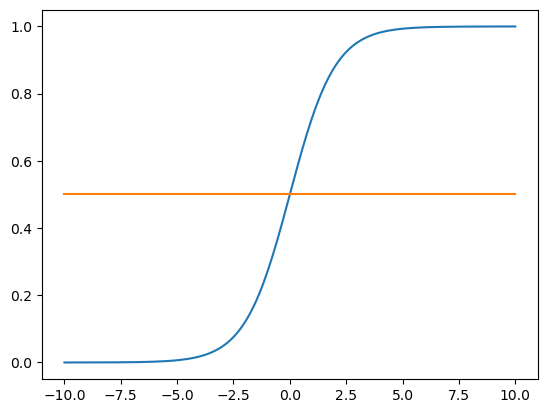

In [82]:
z_t = torch.ones([200, 1]) * 0.5
plt.plot(x_t, y_t)
plt.plot(x_t, z_t)
